In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', 100)
df = pd.read_excel('data/default of credit card clients.xls' , header = 1)
df.drop('ID', axis = 1, inplace = True)
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,0,188948,192815,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,0,1683,1828,3502,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,0,3565,3356,2758,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,-1,-1645,78379,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [4]:
df.dtypes

LIMIT_BAL                     int64
SEX                           int64
EDUCATION                     int64
MARRIAGE                      int64
AGE                           int64
PAY_0                         int64
PAY_2                         int64
PAY_3                         int64
PAY_4                         int64
PAY_5                         int64
PAY_6                         int64
BILL_AMT1                     int64
BILL_AMT2                     int64
BILL_AMT3                     int64
BILL_AMT4                     int64
BILL_AMT5                     int64
BILL_AMT6                     int64
PAY_AMT1                      int64
PAY_AMT2                      int64
PAY_AMT3                      int64
PAY_AMT4                      int64
PAY_AMT5                      int64
PAY_AMT6                      int64
default payment next month    int64
dtype: object

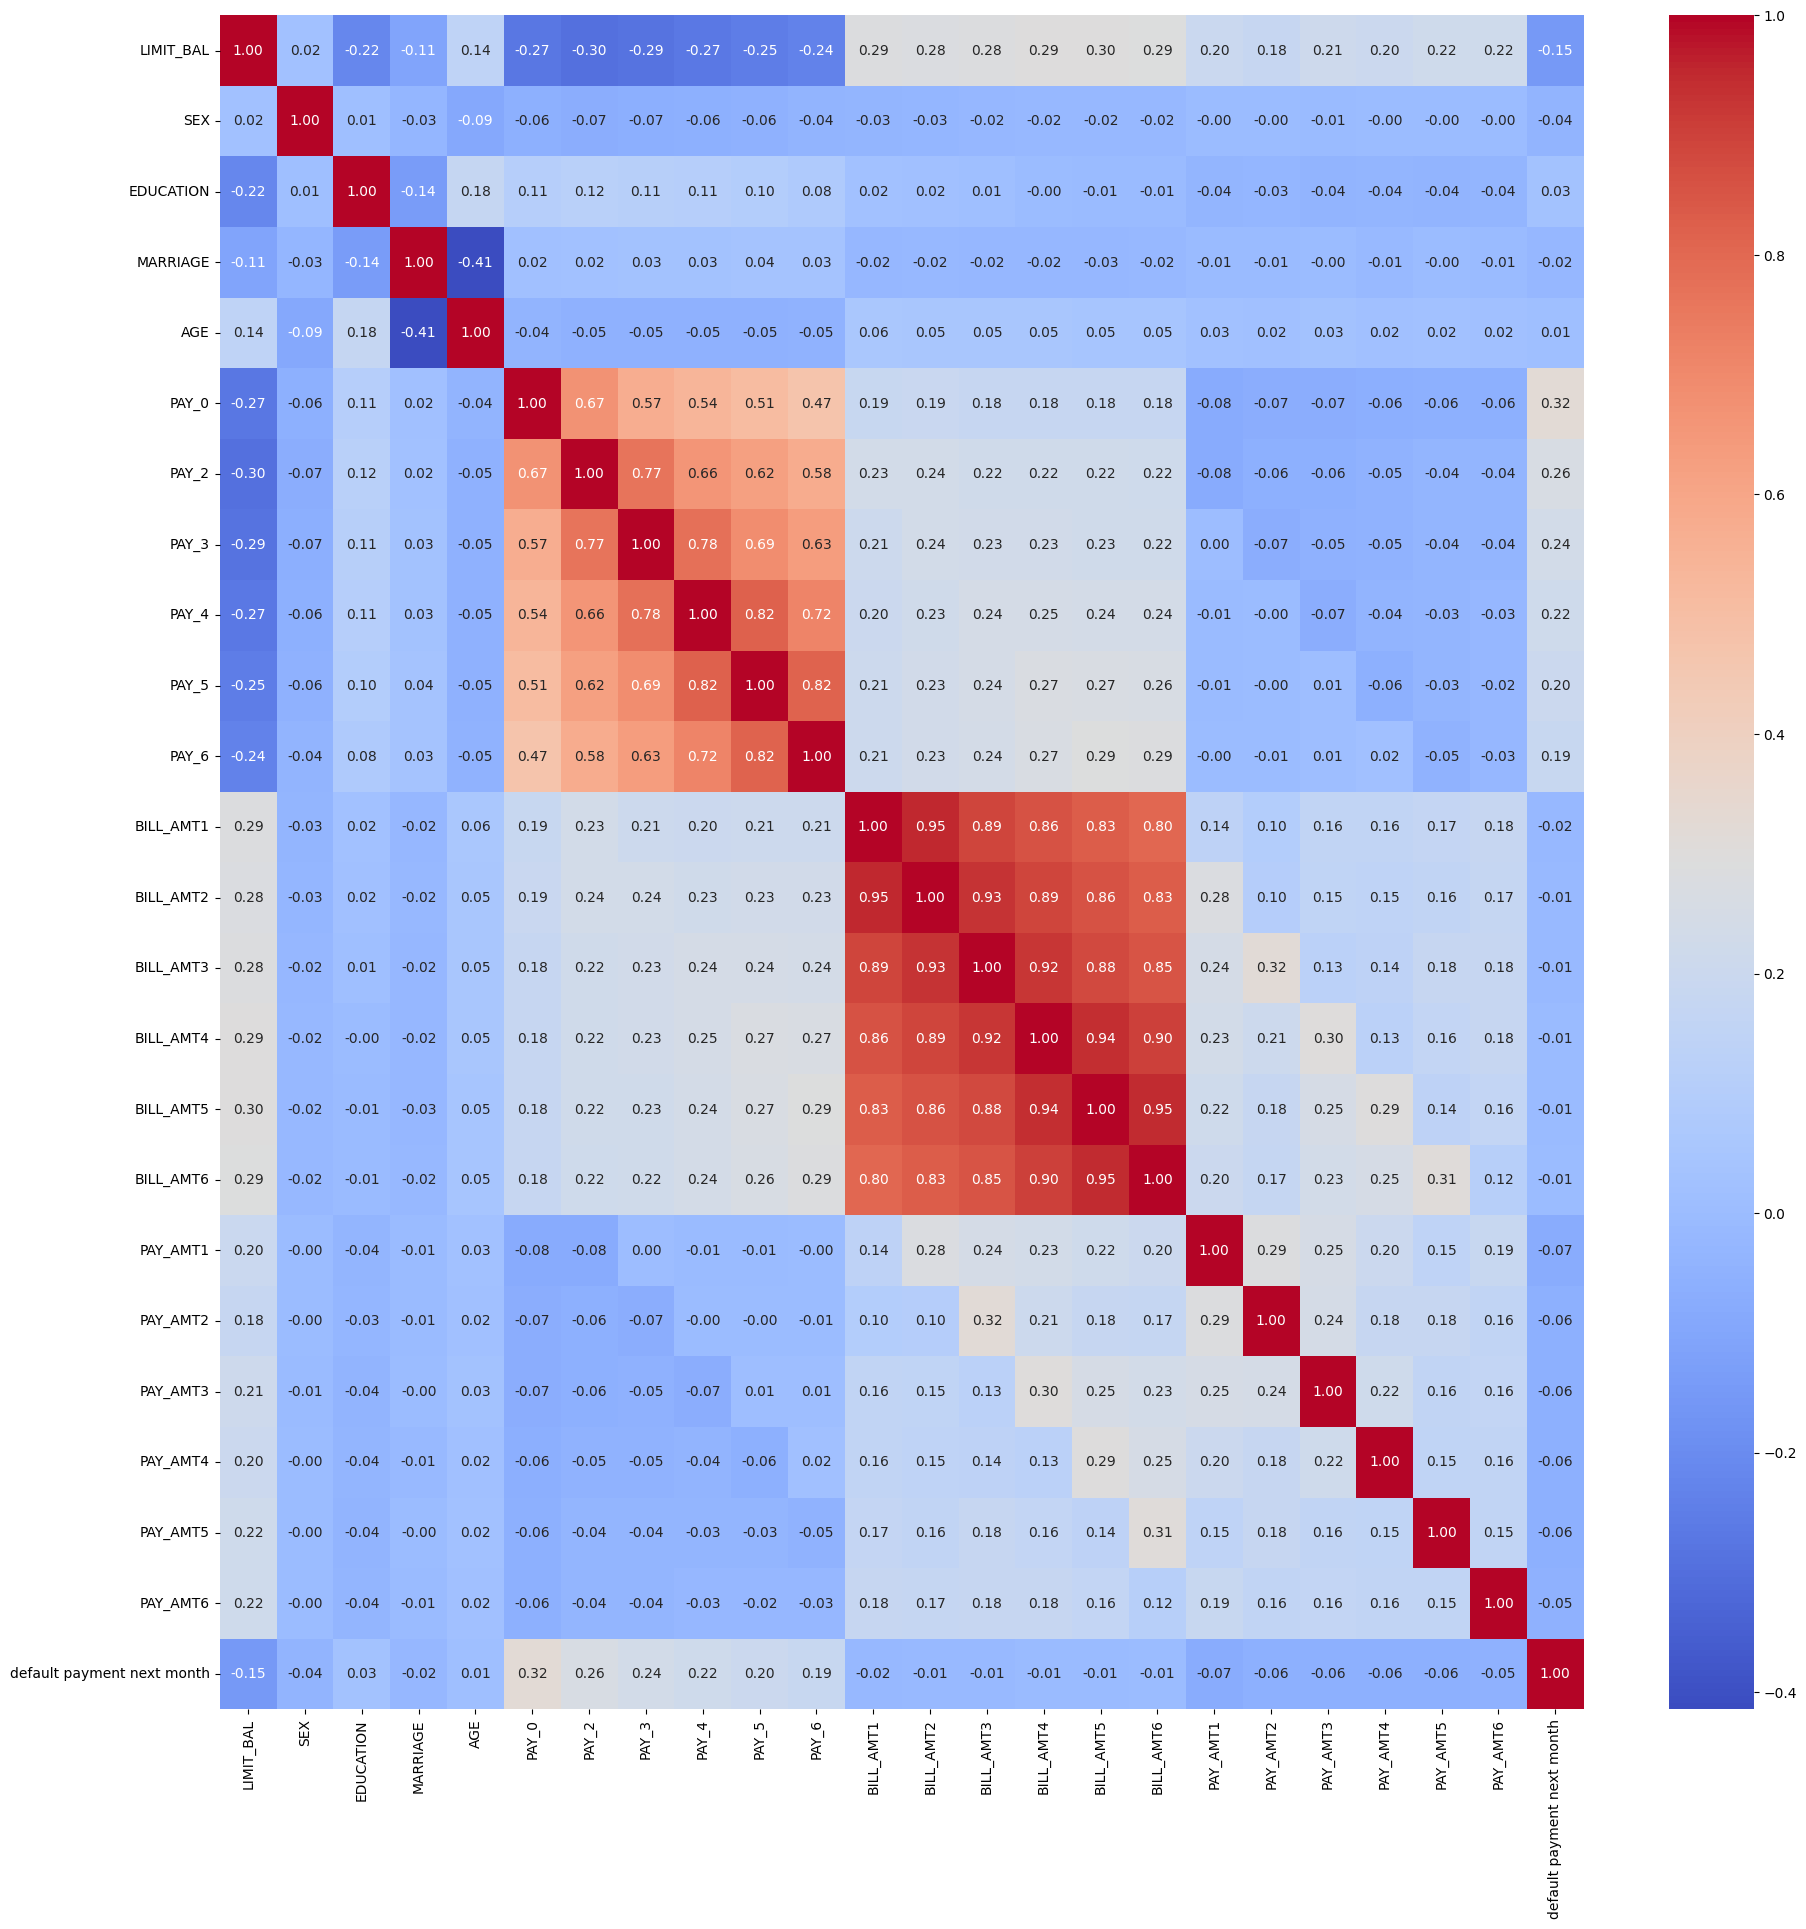

In [5]:
# corrélations entre les variables
# heatmap
plt.figure(figsize = (22, 22))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')
plt.show()

In [7]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, learning_curve, train_test_split, validation_curve
from sklearn.tree import DecisionTreeClassifier


X = df.drop('default payment next month', axis=1)
y = df['default payment next month']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# separer les categories features et les numériques
numeric_features = X_train.drop(['AGE' , 'EDUCATION' , 'MARRIAGE' , 'SEX' ] , axis = 1)
# met les numeric features dans un pipeline
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
])

# création du pipeline avec des transformers
pipe = Pipeline([
    ('numeric', numeric_pipeline),
    ('clf', DecisionTreeClassifier())
])

# définition des paramètres pour le GridSearchCV
param_grid = {
    'clf__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clf__min_samples_split': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clf__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'clf__max_features': [None,'sqrt', 'log2'],
    'clf__criterion': ['gini', 'entropy']
}

# test plusieurs paramètres pour le modèle avec un gridsearch
model = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)
model.fit(X_train, y_train)

# affichage des meilleurs paramètres et du score sur le jeu de test
print(f"Meilleurs paramètres : {model.best_params_}")
print(f"Score sur le jeu de test : {model.score(X_test, y_test)}")


# meilleur paramètre
# {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__max_features': None, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}


Meilleurs paramètres : {'clf__criterion': 'entropy', 'clf__max_depth': 4, 'clf__max_features': None, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}
Score sur le jeu de test : 0.8211666666666667


In [ ]:
model.best_estimator_